In [100]:
import time 
import pandas as pd
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [101]:
url=f'https://search.naver.com/search.naver?where=news&ie=utf8&sm=nws_hty&query=%EA%B5%90%ED%86%B5%EC%95%BD%EC%9E%90'
driver = webdriver.Chrome()
driver.get(url)
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [102]:
# 기사 목록
lis = soup.select('.list_news> li')
len(lis)

10

In [103]:
# 기사 제목
li = lis[0]
title = li.select_one('.news_tit').get_text().strip()
title

'“교통약자 이동권은 ‘기본권’… 인식 개선을”'

In [104]:
driver.find_element(By.CSS_SELECTOR, '#main_pack > div.api_sc_page_wrap > div > a.btn_next').click()

In [105]:
data = []
for i in range(6):
    driver.find_element(By.CSS_SELECTOR, '#main_pack > div.api_sc_page_wrap > div > a.btn_next').click()
    time.sleep(1)

    soup = BeautifulSoup(driver.page_source, 'html.parser')
    lis = soup.select('.list_news> li')
    li = lis[0]
    title = li.select_one('.news_tit').get_text().strip()

    for li in lis:
        title = li.select_one('.news_tit').get_text().strip()
        data.append(title)
driver.close()


In [106]:
with open('data/교통약자워드클라우드.txt', 'w', encoding='utf-8') as file:
    for title in data:
        file.write(title + '\n')

- 워드클라우드

In [107]:
with open('data/교통약자워드클라우드.txt') as file:
    text = file.read()

In [108]:
import re, nltk
from konlpy.tag import Okt
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [109]:
okt = Okt()
tokens = okt.nouns(text)
tokens[:10]

['교통', '약자', '플랫폼', '택시', '이용', '지자체', '지원', '추진', '제주도', '교통']

In [110]:
# 영문자, 숫자, 구둣점 제거
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token)
    if item:        # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

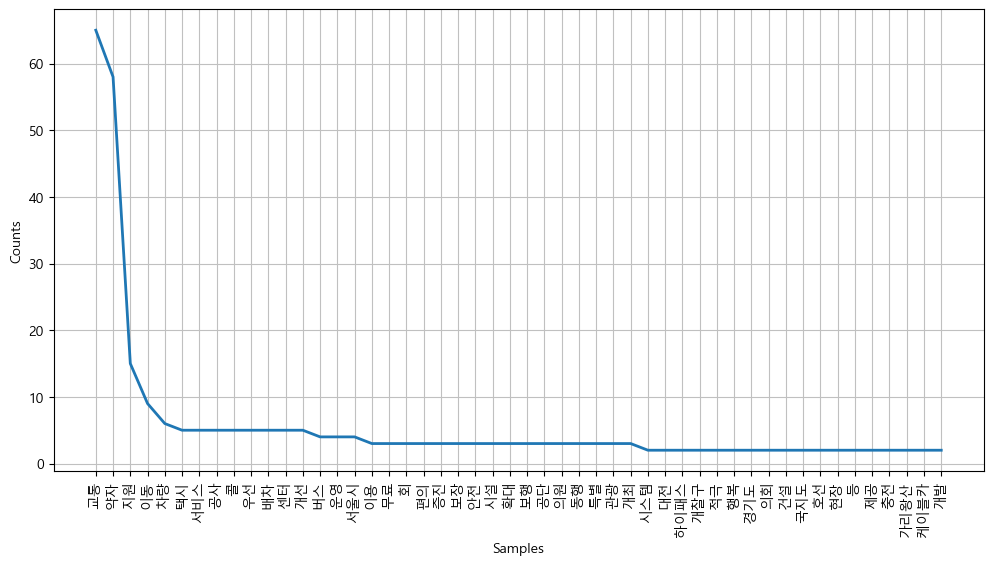

In [127]:
gift = nltk.Text(new_tokens, name='교통약자')
plt.figure(figsize=(12,6))
gift.plot(50);

In [126]:
stoptext = """ 제주도 추진 수험생 플랫폼 지자체 뉴 시공사 코리아 전자통신 위 광주시 남이공 정선군 의정부시 수능 동권 학년 임차"""
stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]

['교통', '약자', '택시', '이용', '지원', '교통', '약자', '무료', '이동', '지원']

In [124]:
gift.vocab().most_common(5)

[('교통', 65), ('약자', 58), ('지원', 15), ('이동', 9), ('차량', 6)]

In [129]:
import numpy as np

In [152]:
mask = np.array(Image.open('data/wheel.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

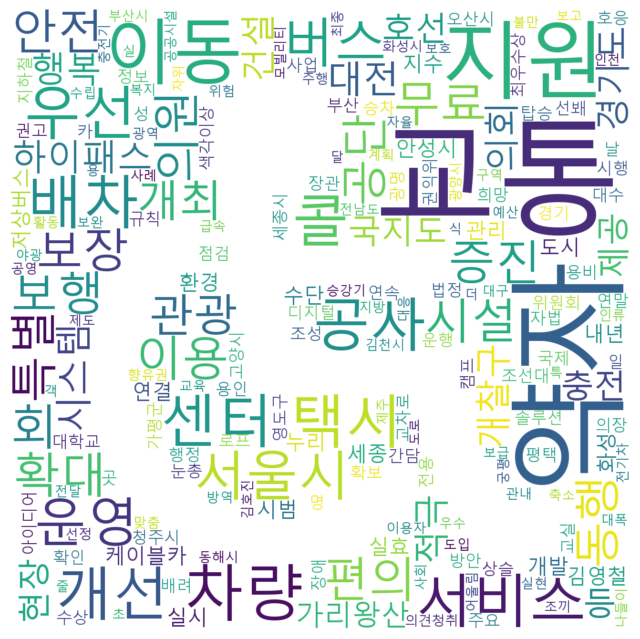

In [153]:
wc = WordCloud(
        background_color='white', random_state=2023,
        mask=mask, font_path='C:/Windows/Fonts/malgun.ttf',
        relative_scaling=0.4
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(8,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

In [148]:
mask = np.array(Image.open('data/whe.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

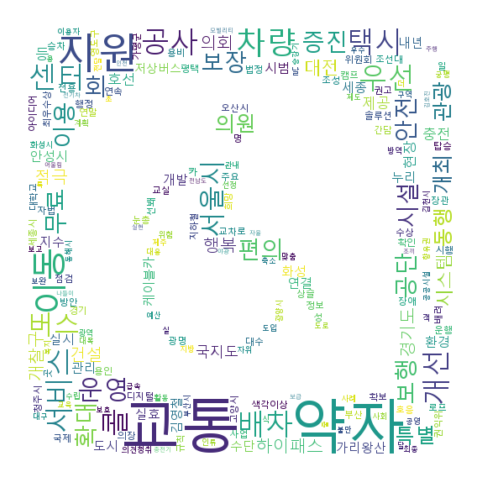

In [150]:
wc = WordCloud(
        background_color='white', random_state=2023,
        mask=mask, font_path='C:/Windows/Fonts/malgun.ttf',
        relative_scaling=0.4
    ).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');